In [2]:
import numpy as np
import option_pricing_binary_tree as op
import option_BS_solutions as obs
import matplotlib.pyplot as plt

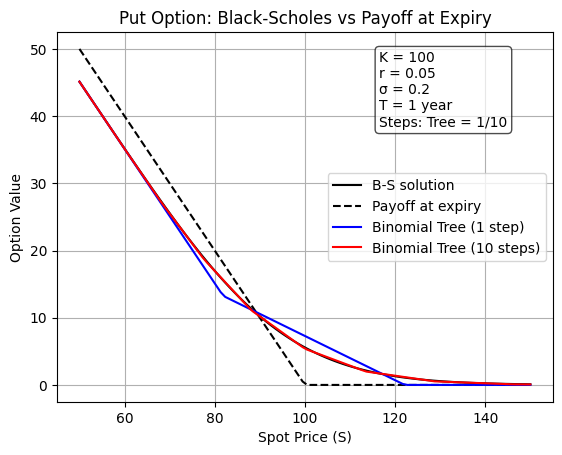

In [5]:
S_grid = np.linspace(50, 150, 100)
bs_solution = []
tree_solution10steps = []
tree_solution100steps = []
for S in S_grid:
    bs_solution.append(obs.V(S, 100, 0.05, 0, 0.2, 1, "put"))
    tree_solution10steps.append(op.eval_option_tree(S, 100, 0.05, 0.2, 1, 1, "put", "european"))
    tree_solution100steps.append(op.eval_option_tree(S, 100, 0.05, 0.2, 1, 10, "put", "european"))

# Payoff at expiry for a put option: max(K - S, 0)
K = 100
payoff = np.maximum(K - S_grid, 0)

plt.plot(S_grid, bs_solution, label="B-S solution", color="black")
plt.plot(S_grid, payoff, label="Payoff at expiry", color="black", linestyle="--")
plt.plot(S_grid, tree_solution10steps, label="Binomial Tree (1 step)", color="blue")
plt.plot(S_grid, tree_solution100steps, label="Binomial Tree (10 steps)", color="red")
plt.xlabel("Spot Price (S)")
plt.ylabel("Option Value")
plt.title("Put Option: Black-Scholes vs Payoff at Expiry")
plt.legend()
plt.grid(True)

# Add fixed quantities as a text box
params_text = (
    "K = 100\n"
    "r = 0.05\n"
    "σ = 0.2\n"
    "T = 1 year\n"
    "Steps: Tree = 1/10"
)
plt.gca().text(
    0.65, 0.95, params_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

plt.show()

Text(0.05, 0.95, 'K = 100,150,200\nr = 0.05\nσ = 0.2')

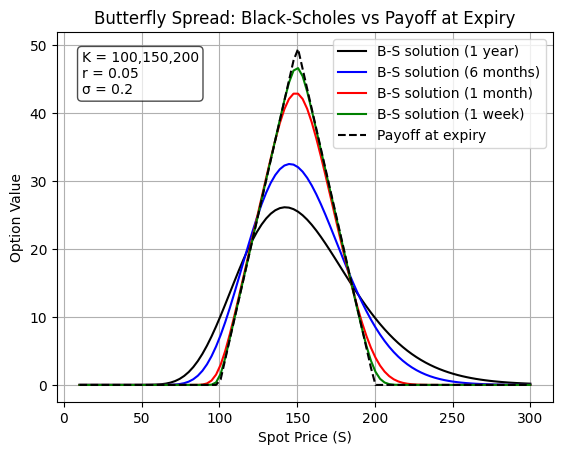

In [6]:
S_grid = np.linspace(10, 300, 100)
bs_solution1yr = []
bs_solution6months = []
bs_solution1months = []
bs_solution1week = []
for S in S_grid:
    bs_solution1yr.append(obs.V_butterfly(S, 100,150,200, 0.05, 0, 0.2, 1))
    bs_solution6months.append(obs.V_butterfly(S, 100,150,200, 0.05, 0, 0.2, 0.5))
    bs_solution1months.append(obs.V_butterfly(S, 100,150,200, 0.05, 0, 0.2, 1/12))
    bs_solution1week.append(obs.V_butterfly(S, 100,150,200, 0.05, 0, 0.2, 1/52))

payoff = np.maximum(S_grid-100, 0)-2*np.maximum( S_grid-150, 0)+np.maximum(S_grid-200, 0)

plt.plot(S_grid, bs_solution1yr, label="B-S solution (1 year)", color="black")
plt.plot(S_grid, bs_solution6months, label="B-S solution (6 months)", color="blue")
plt.plot(S_grid, bs_solution1months, label="B-S solution (1 month)", color="red")
plt.plot(S_grid, bs_solution1week, label="B-S solution (1 week)", color="green")
plt.plot(S_grid, payoff, label="Payoff at expiry", color="black", linestyle="--")
plt.xlabel("Spot Price (S)")
plt.ylabel("Option Value")
plt.title("Butterfly Spread: Black-Scholes vs Payoff at Expiry")
plt.legend()
plt.grid(True)

# Add fixed quantities as a text box
params_text = (
    "K = 100,150,200\n"
    "r = 0.05\n"
    "σ = 0.2"
)
plt.gca().text(
    0.05, 0.95, params_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

Text(0.7, 0.7, 'S(0) =100\nK =100\nr = 0.05\nmu = 0.1\nσ = 0.2')

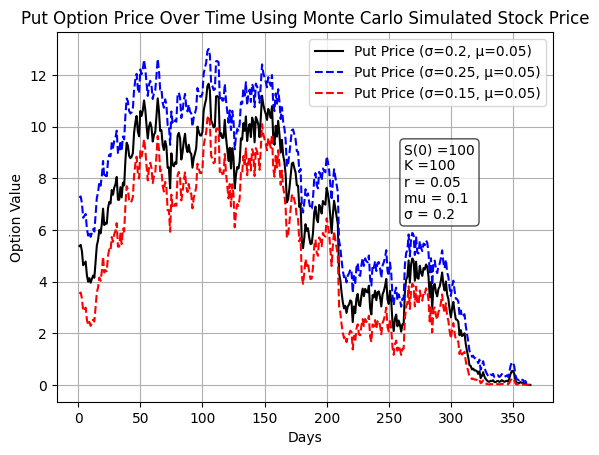

In [7]:
stock_monte_carlo =  [0] * 365;
stock_monte_carlo[0] = 100
put_price = []
put_price_over_sigma = []
put_price_under_sigma = []
np.random.seed(42)
for i in range(1, 365):
    z = np.random.normal()
    stock_monte_carlo[i] = stock_monte_carlo[i-1] * np.exp((0.05 - 0.5 * 0.2**2) * (1/365) + 0.2 * np.sqrt(1/365) * z)
    put_price.append(obs.V(stock_monte_carlo[i], 100, 0.05, 0, 0.2, (365 - i)/365, "put"))
    put_price_over_sigma.append(obs.V(stock_monte_carlo[i], 100, 0.05, 0, 0.25, (365 - i)/365, "put"))
    put_price_under_sigma.append(obs.V(stock_monte_carlo[i], 100, 0.05, 0, 0.15, (365 - i)/365, "put"))


plt.plot(range(1, 365), put_price, label="Put Price (σ=0.2, μ=0.05)", color="black")
plt.plot(range(1, 365), put_price_over_sigma, label="Put Price (σ=0.25, μ=0.05)", color="blue", linestyle="--")
plt.plot(range(1, 365), put_price_under_sigma, label="Put Price (σ=0.15, μ=0.05)", color="red", linestyle="--")

plt.xlabel("Days")
plt.ylabel("Option Value")
plt.title("Put Option Price Over Time Using Monte Carlo Simulated Stock Price")
plt.legend()
plt.grid(True)  
# Add fixed quantities as a text box
params_text = (
    "S(0) =100\n"
    "K =100\n"
    "r = 0.05\n"
    "mu = 0.1\n"
    "σ = 0.2"
)
plt.gca().text(
    0.7, 0.7, params_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

Text(0.7, 0.7, 'S(0) =100\nK =100\nr = 0.05\nmu = 0.2\nσ = 0.2')

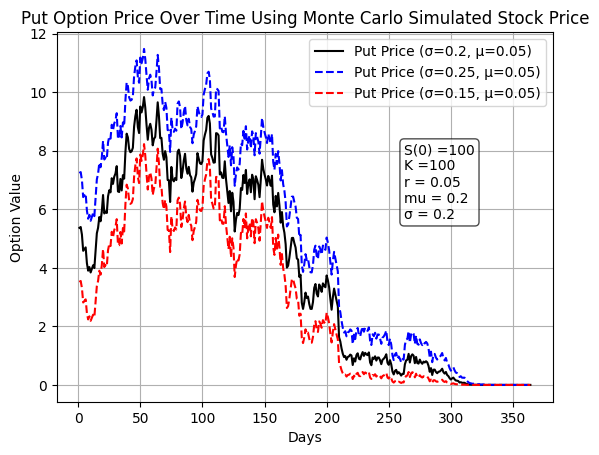

In [8]:
stock_monte_carlo =  [0] * 365;
stock_monte_carlo[0] = 100
put_price = []
put_price_over_sigma = []
put_price_under_sigma = []
np.random.seed(42)
for i in range(1, 365):
    z = np.random.normal()
    stock_monte_carlo[i] = stock_monte_carlo[i-1] * np.exp((0.2 - 0.5 * 0.2**2) * (1/365) + 0.2 * np.sqrt(1/365) * z)
    put_price.append(obs.V(stock_monte_carlo[i], 100, 0.05, 0, 0.2, (365 - i)/365, "put"))
    put_price_over_sigma.append(obs.V(stock_monte_carlo[i], 100, 0.05, 0, 0.25, (365 - i)/365, "put"))
    put_price_under_sigma.append(obs.V(stock_monte_carlo[i], 100, 0.05, 0, 0.15, (365 - i)/365, "put"))


plt.plot(range(1, 365), put_price, label="Put Price (σ=0.2, μ=0.05)", color="black")
plt.plot(range(1, 365), put_price_over_sigma, label="Put Price (σ=0.25, μ=0.05)", color="blue", linestyle="--")
plt.plot(range(1, 365), put_price_under_sigma, label="Put Price (σ=0.15, μ=0.05)", color="red", linestyle="--")

plt.xlabel("Days")
plt.ylabel("Option Value")
plt.title("Put Option Price Over Time Using Monte Carlo Simulated Stock Price")
plt.legend()
plt.grid(True)  
# Add fixed quantities as a text box
params_text = (
    "S(0) =100\n"
    "K =100\n"
    "r = 0.05\n"
    "mu = 0.2\n"
    "σ = 0.2"
)
plt.gca().text(
    0.7, 0.7, params_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

Text(0.7, 0.7, 'S(0) =100\nK =75\nr = 0.05\nmu = 0.1\nσ = 0.2')

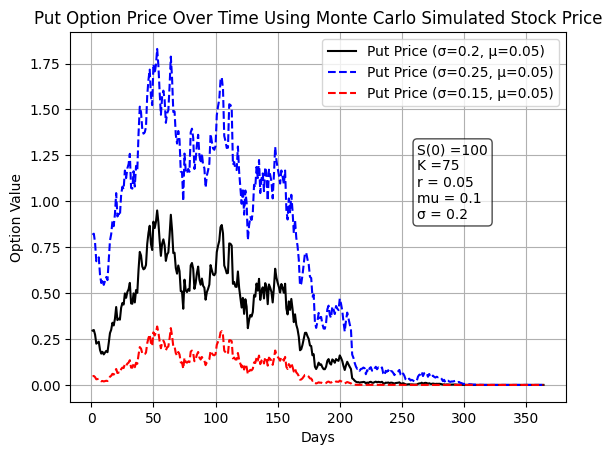

In [10]:
stock_monte_carlo =  [0] * 365;
stock_monte_carlo[0] = 100
put_price = []
put_price_over_sigma = []
put_price_under_sigma = []
np.random.seed(42)
for i in range(1, 365):
    z = np.random.normal()
    stock_monte_carlo[i] = stock_monte_carlo[i-1] * np.exp((0.05 - 0.5 * 0.2**2) * (1/365) + 0.2 * np.sqrt(1/365) * z)
    put_price.append(obs.V(stock_monte_carlo[i], 75, 0.05, 0, 0.2, (365 - i)/365, "put"))
    put_price_over_sigma.append(obs.V(stock_monte_carlo[i], 75, 0.05, 0, 0.25, (365 - i)/365, "put"))
    put_price_under_sigma.append(obs.V(stock_monte_carlo[i], 75, 0.05, 0, 0.15, (365 - i)/365, "put"))


plt.plot(range(1, 365), put_price, label="Put Price (σ=0.2, μ=0.05)", color="black")
plt.plot(range(1, 365), put_price_over_sigma, label="Put Price (σ=0.25, μ=0.05)", color="blue", linestyle="--")
plt.plot(range(1, 365), put_price_under_sigma, label="Put Price (σ=0.15, μ=0.05)", color="red", linestyle="--")

plt.xlabel("Days")
plt.ylabel("Option Value")
plt.title("Put Option Price Over Time Using Monte Carlo Simulated Stock Price")
plt.legend()
plt.grid(True)  
# Add fixed quantities as a text box
params_text = (
    "S(0) =100\n"
    "K =75\n"
    "r = 0.05\n"
    "mu = 0.1\n"
    "σ = 0.2"
)
plt.gca().text(
    0.7, 0.7, params_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

Text(0.7, 0.7, 'S(0) =100\nK =125\nr = 0.05\nmu = 0.1\nσ = 0.2')

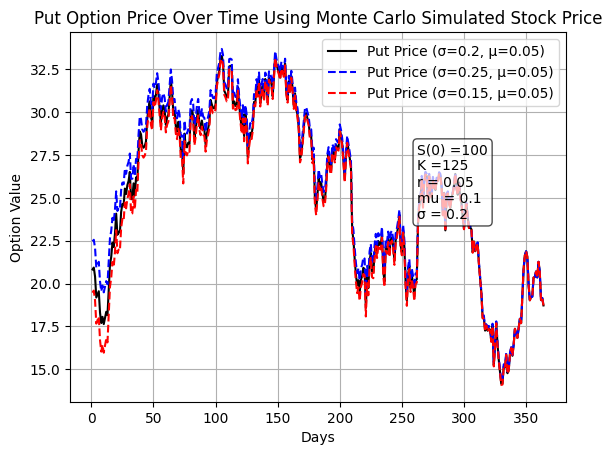

In [11]:
stock_monte_carlo =  [0] * 365;
stock_monte_carlo[0] = 100
put_price = []
put_price_over_sigma = []
put_price_under_sigma = []
np.random.seed(42)
for i in range(1, 365):
    z = np.random.normal()
    stock_monte_carlo[i] = stock_monte_carlo[i-1] * np.exp((0.05 - 0.5 * 0.2**2) * (1/365) + 0.2 * np.sqrt(1/365) * z)
    put_price.append(obs.V(stock_monte_carlo[i], 125, 0.05, 0, 0.2, (365 - i)/365, "put"))
    put_price_over_sigma.append(obs.V(stock_monte_carlo[i], 125, 0.05, 0, 0.25, (365 - i)/365, "put"))
    put_price_under_sigma.append(obs.V(stock_monte_carlo[i], 125, 0.05, 0, 0.15, (365 - i)/365, "put"))


plt.plot(range(1, 365), put_price, label="Put Price (σ=0.2, μ=0.05)", color="black")
plt.plot(range(1, 365), put_price_over_sigma, label="Put Price (σ=0.25, μ=0.05)", color="blue", linestyle="--")
plt.plot(range(1, 365), put_price_under_sigma, label="Put Price (σ=0.15, μ=0.05)", color="red", linestyle="--")

plt.xlabel("Days")
plt.ylabel("Option Value")
plt.title("Put Option Price Over Time Using Monte Carlo Simulated Stock Price")
plt.legend()
plt.grid(True)  
# Add fixed quantities as a text box
params_text = (
    "S(0) =100\n"
    "K =125\n"
    "r = 0.05\n"
    "mu = 0.1\n"
    "σ = 0.2"
)
plt.gca().text(
    0.7, 0.7, params_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

In [11]:
result=[];
for i in np.arange(1, 5, 0.2):
    cur_result=0
    N = int(10**i)
    for j in range(N):
        path = [0] * 365;
        path[0] = 100
        for k in range(1, 365):
            z = np.random.normal()
            path[k] = path[k-1] * np.exp((0.05 - 0.5 * 0.2**2) * (1/365) + 0.2 * np.sqrt(1/365) * z)
        cur_result += np.maximum(100-path[364],0)
    result.append(np.exp(-0.05*1)*cur_result/(N))

In [13]:
errors = np.zeros(len(result))
expRange = np.arange(1, 5, 0.2)
for i in range(len(result)):
    errors[i] = 2*abs(result[i]/np.sqrt(10**expRange[i]))

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2446/2772401508.py:1: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(np.arange(1, 5, 0.2), result, marker='o', label='Numerical estimate (2$\sigma$ error bars)')


Text(0.75, 0.75, 'Put option\nS(0) =100\nK =100\nr = 0.05\nmu = 0.1\nσ = 0.2')

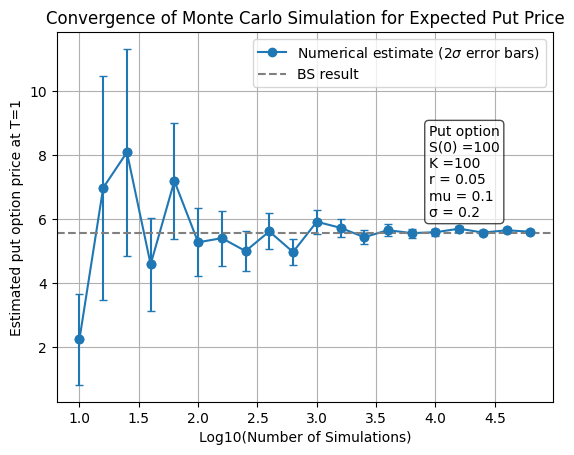

In [19]:
plt.plot(np.arange(1, 5, 0.2), result, marker='o', label='Numerical estimate (2$\sigma$ error bars)')
plt.errorbar(np.arange(1, 5, 0.2), result, yerr=errors, fmt='o', color='C0', capsize=3)
plt.axhline(y=obs.V(100,100,0.05,0,0.2,1,"put"), color='gray', linestyle='--', label='BS result')
plt.xlabel('Log10(Number of Simulations)')
plt.ylabel('Estimated put option price at T=1')
plt.title('Convergence of Monte Carlo Simulation for Expected Put Price')
plt.legend()
plt.grid(True)  
# Add fixed quantities as a text box
params_text = (
    "Put option\n"
    "S(0) =100\n"
    "K =100\n"
    "r = 0.05\n"
    "mu = 0.1\n"
    "σ = 0.2"
)
plt.gca().text(
    0.75, 0.75, params_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)